In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import datetime as dt

In [2]:
url="https://docs.google.com/spreadsheets/d/e/2PACX-1vT_jChgNsQbHbg4TGepzIqk8XC9DTIKmyyxb1upo5cfZCgbfIUQc2ZC0YMzuU5uApP140Ob49KBjdqh/pub?gid=1198589591&single=true&output=csv"
df = pd.read_csv(url)
df

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0
...,...,...,...,...,...,...,...,...,...,...
15336,20201227,1.0,0.9,32.0,7.5,7.5,7.6,2.0,98000.0,NaN
15337,20201228,7.0,3.7,38.0,3.6,1.1,-1.3,0.2,97370.0,NaN
15338,20201229,7.0,0.0,21.0,4.1,2.6,1.1,0.0,98830.0,NaN
15339,20201230,6.0,0.4,22.0,5.6,2.7,-0.1,0.0,100200.0,NaN


## Part 1) Load the data and make a datetime index.
1. Convert the date column to datetime dtype.
2. Set the date column as the index.
3. Filter out only the required data:
- Keep only data from the year 2000 or later.
- Keep only the following features:
    - precipitation
    - mean_temp
    - min_temp
    - max_temp
    - snow_depth
4. Impute any missing values.

In [3]:
df['date']=pd.to_datetime(df['date'],format='%Y%m%d')
df=df.set_index('date')
df

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
date,,,,,,,,,
1979-01-01,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1979-01-02,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
1979-01-03,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
1979-01-04,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
1979-01-05,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0
...,...,...,...,...,...,...,...,...,...
2020-12-27,1.0,0.9,32.0,7.5,7.5,7.6,2.0,98000.0,NaN
2020-12-28,7.0,3.7,38.0,3.6,1.1,-1.3,0.2,97370.0,NaN
2020-12-29,7.0,0.0,21.0,4.1,2.6,1.1,0.0,98830.0,NaN


In [4]:
df=df.loc['2000':,['precipitation', 'mean_temp', 'min_temp', 
                   'max_temp', 'snow_depth']].copy()
df.head()

,precipitation,mean_temp,min_temp,max_temp,snow_depth
date,,,,,
2000-01-01,0.0,7.0,4.9,10.8,0.0
2000-01-02,0.2,7.9,5.0,11.5,0.0
2000-01-03,6.0,9.4,7.2,9.5,0.0
2000-01-04,0.2,7.0,4.4,11.0,0.0
2000-01-05,0.8,6.4,1.9,10.8,0.0


In [5]:
df.isna().sum()

precipitation     390
mean_temp         419
min_temp          386
max_temp          390
snow_depth       1752
dtype: int64

In [6]:
## interpolating temperature measures
df['mean_temp'] = df['mean_temp'].interpolate()
df['max_temp'] = df['max_temp'].interpolate()
df['min_temp'] = df['min_temp'].interpolate()
# filling preciptation/snow with Forward-Fill/Backward-Fill
df['precipitation'] = df['precipitation'].fillna(method='bfill')
df['snow_depth'] = df['snow_depth'].fillna(method='ffill')
df.isna().sum()

precipitation    0
mean_temp        0
min_temp         0
max_temp         0
snow_depth       0
dtype: int64

## Part 2) Answer the Questions with Visualizations (Using the Correct Frequency)
Q1: What month had the most precipitation between 2000 through 2010?

In [7]:
# Resample the precipitation column to a Monthly frequency using .sum() as the aggregation method
ts = df.loc['2000':'2010','precipitation'].copy()
ts_MS = ts.resample("MS").sum()
ts_MS.name = 'Resampled precipitation'
ts_MS.head()

date
2000-01-01    14.7
2000-02-01    67.4
2000-03-01    14.2
2000-04-01    90.8
2000-05-01    87.4
Freq: MS, Name: Resampled precipitation, dtype: float64

In [8]:
#Find the date and corresponding value for the max precipitation.
max_MS = ts_MS.idxmax()
max_MS_value = ts_MS.max()
print(max_MS, 'and', max_MS_value)

2009-11-01 00:00:00 and 146.8


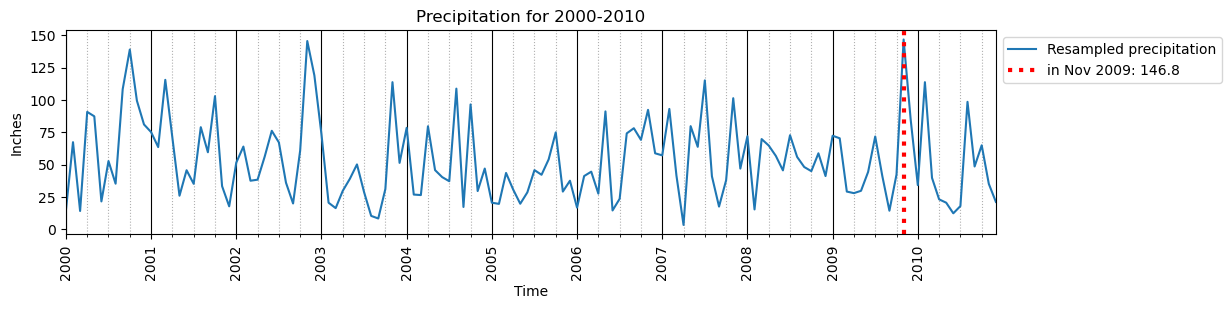

In [9]:
#Plot the feature and time period that corresponds to the question
fig, ax = plt.subplots(figsize=(12,3))
## creating our tick locators and formatters
loc_month = mdates.MonthLocator(3)
fmt_month = mdates.DateFormatter("%b")
loc_year = mdates.YearLocator()
fmt_year = mdates.DateFormatter("%Y")
## customize minor ticks
ax.xaxis.set_minor_locator(loc_month)
ax.xaxis.set_minor_formatter(fmt_month)
## customize major ticks
ax.xaxis.set_major_locator(loc_year)
ax.xaxis.set_major_formatter(fmt_year)
ax = ts_MS.plot(title='Precipitation for 2000-2010',ylabel="Inches",xlabel='Time')
ax.axvline('2009-11',color='red',lw=3, ls=':',label='in Nov 2009: 146.8')
## Making major/minor gridlines visually distinct
ax.grid(which='minor',axis='x',ls=":")
ax.grid(which='major',axis='x',color='black')
ax.legend(bbox_to_anchor=[1,1])
fig.autofmt_xdate(rotation=90,ha='center');

Q2: Which year between 2000-2020 had the coolest average temperature?

In [10]:
#Resample the  mean_temp data to a Yearly frequency using .mean() as the aggregation method.
ts = df['mean_temp'].copy()
ts_YS = ts.resample("YS").mean()
ts_YS.name = 'Resampled mean_temp'
ts_YS.head()

date
2000-01-01    11.575683
2001-01-01    11.331507
2002-01-01    12.084247
2003-01-01    12.114521
2004-01-01    11.900683
Freq: AS-JAN, Name: Resampled mean_temp, dtype: float64

In [11]:
# Determine the year and value for the lowest mean temp
min_YS = ts_YS.idxmin()
min_YS_value = ts_YS.min()
print(min_YS, 'and', min_YS_value)

2010-01-01 00:00:00 and 10.657397260273973


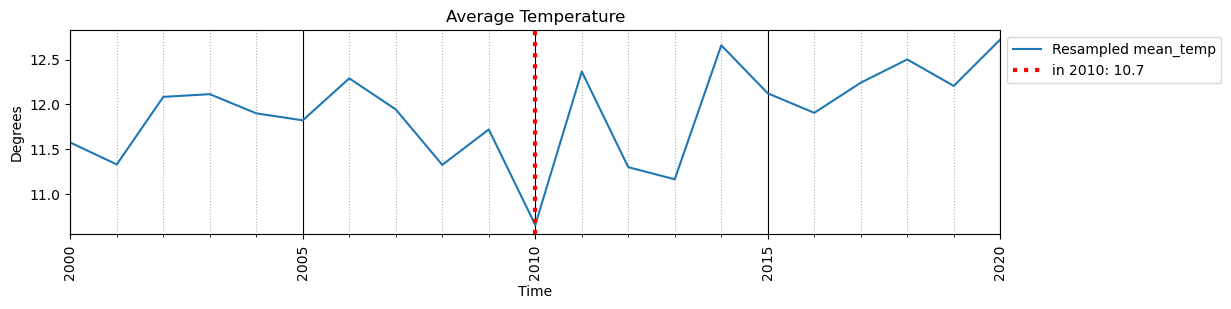

In [12]:
# Plot the feature and time period that corresponds to the question
fig, ax = plt.subplots(figsize=(12,3))
## creating our tick locators and formatters
loc_yearr = mdates.YearLocator(5)
fmt_yearr = mdates.DateFormatter("%Y")
loc_year = mdates.YearLocator()
fmt_year = mdates.DateFormatter("%Y")
## customize minor ticks
ax.xaxis.set_minor_locator(loc_year)
ax.xaxis.set_minor_formatter(fmt_year)
## customize major ticks
ax.xaxis.set_major_locator(loc_yearr)
ax.xaxis.set_major_formatter(fmt_yearr)
ax = ts_YS.plot(title="Average Temperature",ylabel="Degrees",xlabel='Time')
ax.axvline('2010',color='red',lw=3, ls=':',label='in 2010: 10.7')
## Making major/minor gridlines visually distinct
ax.grid(which='minor',axis='x',ls=":")
ax.grid(which='major',axis='x',color='black')
ax.legend(bbox_to_anchor=[1,1])
fig.autofmt_xdate(rotation=90,ha='center');